<a href="https://colab.research.google.com/github/Jenishhd/DL_Project/blob/main/DL_Animals_Model_Chloe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import zipfile
import os
import cv2
from google.colab import drive
#drive.mount('/content/drive')

In [5]:

# zip_ref = zipfile.ZipFile('/tmp/archive.zip', 'r') #Opens the zip file in read mode
#####----------------------

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Csulb/Spring 2022 (Last Semester!)/CECS 456 Machine Learning/CECS456_Project/archive.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
len(os.listdir('/content/raw-img/'))

10

In [8]:
print("dogs",len(os.listdir('/content/raw-img/cane')))
print("horse",len(os.listdir('/content/raw-img/cavallo')))
print("elefant",len(os.listdir('/content/raw-img/elefante')))
print("butterfly",len(os.listdir('/content/raw-img/farfalla')))
print("chicken",len(os.listdir('/content/raw-img/gallina')))
print("cat",len(os.listdir('/content/raw-img/gatto')))
print("cow",len(os.listdir('/content/raw-img/mucca')))
print("sheep",len(os.listdir('/content/raw-img/pecora')))
print("spider",len(os.listdir('/content/raw-img/ragno')))
print("squirrel",len(os.listdir('/content/raw-img/scoiattolo')))

dogs 4863
horse 2623
elefant 1446
butterfly 2112
chicken 3098
cat 1668
cow 1866
sheep 1820
spider 4821
squirrel 1862


In [9]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

#Splitting into train and test
import shutil

rootdir= '/content/raw-img' #path of the original folder

classes = ['cane', 'cavallo', 'elefante','farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [10]:



# for cl in classes:
#     path = os.path.join(rootdir, cl)
#     for im_path in os.listdir(path):
#         img = cv2.imread(os.path.join(path, im_path))
#         plt.imshow(img)
#         break
#     break

for i in classes:
  os.makedirs(rootdir +'/train/' + i)
  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i
  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.25

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

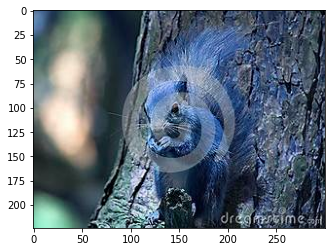

In [11]:

#add to train 
allTrain = []


count = 0
for i in classes:
  rootdir= '/content/raw-img/train'
  source = rootdir + '/' + i
  allFileNames = os.listdir(source)
  # print(len(allFileNames))
  for name in allFileNames:
    try:
        img = cv2.imread(os.path.join(source, name))
        # print(os.path.join(source, name))
        resized_img = cv2.resize(img, (128,128))
        #X_train_full.append(resized_img)
        allTrain.append([resized_img,count])
        plt.imshow(img)
    except Exception as e:
        pass
    #y_train_full.append(i)
  count += 1

# X_test = []
# y_test = []
allTest = []
#add to test
count = 0
for i in classes:
  rootdir= '/content/raw-img/test'
  source = rootdir + '/' + i
  allFileNames = os.listdir(source)

  for name in allFileNames:
    try:
        img = cv2.imread(os.path.join(source, name))
        resized_img = cv2.resize(img, (128,128))
        # X_test.append(resized_img)
        allTest.append([resized_img,count])
        # plt.imshow(img)
    except Exception as e:
        pass
    # y_test.append(i)
  count += 1

In [12]:
random.shuffle(allTrain)
X_train_full = []
y_train_full = []

print(allTrain[0])
for x, y in allTrain:
  X_train_full.append(x)
  y_train_full.append(y)

random.shuffle(allTest)
X_test = []
y_test = []

for x,y in allTest:
  X_test.append(x)
  y_test.append(y)

[array([[[ 23,  35,  39],
        [ 20,  32,  36],
        [ 38,  49,  54],
        ...,
        [ 72,  38,  25],
        [ 64,  32,  19],
        [ 63,  32,  18]],

       [[ 14,  28,  32],
        [  5,  20,  23],
        [ 27,  39,  46],
        ...,
        [ 61,  31,  21],
        [ 58,  30,  19],
        [ 59,  31,  20]],

       [[  1,  16,  21],
        [  3,  19,  24],
        [ 23,  35,  44],
        ...,
        [ 55,  30,  21],
        [ 56,  34,  26],
        [ 55,  34,  24]],

       ...,

       [[104, 119, 121],
        [105, 120, 123],
        [108, 120, 129],
        ...,
        [ 55,  64,  64],
        [ 49,  60,  62],
        [ 28,  40,  42]],

       [[112, 127, 129],
        [110, 125, 128],
        [105, 118, 127],
        ...,
        [ 49,  59,  58],
        [ 49,  62,  63],
        [ 31,  43,  45]],

       [[120, 135, 137],
        [108, 123, 126],
        [114, 126, 135],
        ...,
        [ 26,  38,  38],
        [ 41,  50,  53],
        [ 35,  44,  46]

In [13]:
# import random


for i in y_train_full[:10]:
    print(i)
print(len(X_train_full))
#print(X_train_full[0])


9
3
3
0
0
0
3
0
0
6
19631


In [14]:
X_train_full = np.array(X_train_full).reshape(-1, 128,128, 3)

In [15]:
y_train_full = np.array(y_train_full)

In [16]:
X_test = np.array(X_test).reshape(-1, 128,128, 3)
y_test = np.array(y_test)

In [17]:
print(type(X_train_full),X_train_full.shape)
print(type(y_train_full),y_train_full.shape)

<class 'numpy.ndarray'> (19631, 128, 128, 3)
<class 'numpy.ndarray'> (19631,)


In [18]:

# datagen = keras.preprocessing.image.ImageDataGenerator()
# # load and iterate training dataset
# train_it = datagen.flow_from_directory('raw-img/train', class_mode='binary', batch_size=5000)
# # load and iterate validation dataset
# #val_it = datagen.flow_from_directory('data/validation/', class_mode='binary', batch_size=64)
# # load and iterate test dataset
# test_it = datagen.flow_from_directory('raw-img/test', class_mode='binary', batch_size=5000)

In [19]:
# X_train_full = np.array(X_train_full)#changeg first
# y_train_full = np.array(y_train_full)
# X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
# y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
# X_test = X_test

# X_train, X_valid = train_it[:-5000], X_train_full[-5000:] #take last 5000 elements for validation (slicing)
# y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:] #^  
# X_test = X_test

In [20]:
# batchX, batchy = train_it.next()
# print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [21]:
# X_test[:3]
# for index, image in enumerate(X_new):
#     plt.subplot(1, 3, index + 1)
#     plt.imshow(image, cmap="binary", interpolation="nearest")
#     plt.axis('off')
#   plt.subplots_adjust(wspace=0.2, hspace=0.5)
#   plt.show()

In [33]:
X_train, X_valid = X_train_full[:-2000], X_train_full[-2000:] #take last 5000 elements for validation (slicing)
y_train, y_valid = y_train_full[:-2000], y_train_full[-2000:] #^  
X_test = X_test


In [34]:
X_train_full.shape

(19631, 128, 128, 3)

In [35]:
y_train

array([9, 3, 3, ..., 7, 5, 6])

In [36]:
X_train_full[0]

array([[[ 23,  35,  39],
        [ 20,  32,  36],
        [ 38,  49,  54],
        ...,
        [ 72,  38,  25],
        [ 64,  32,  19],
        [ 63,  32,  18]],

       [[ 14,  28,  32],
        [  5,  20,  23],
        [ 27,  39,  46],
        ...,
        [ 61,  31,  21],
        [ 58,  30,  19],
        [ 59,  31,  20]],

       [[  1,  16,  21],
        [  3,  19,  24],
        [ 23,  35,  44],
        ...,
        [ 55,  30,  21],
        [ 56,  34,  26],
        [ 55,  34,  24]],

       ...,

       [[104, 119, 121],
        [105, 120, 123],
        [108, 120, 129],
        ...,
        [ 55,  64,  64],
        [ 49,  60,  62],
        [ 28,  40,  42]],

       [[112, 127, 129],
        [110, 125, 128],
        [105, 118, 127],
        ...,
        [ 49,  59,  58],
        [ 49,  62,  63],
        [ 31,  43,  45]],

       [[120, 135, 137],
        [108, 123, 126],
        [114, 126, 135],
        ...,
        [ 26,  38,  38],
        [ 41,  50,  53],
        [ 35,  44,  46]]

In [37]:
cnn = tf.keras.models.Sequential() #initializing the CNN
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding = "same", input_shape=[128, 128, 3])) #Convolution 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 2
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 5
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3
cnn.add(tf.keras.layers.Flatten()) #Flaterning
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))#Full Connection1
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units=64, activation="relu"))#Full Connection2
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

In [38]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      9472      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 256)      

In [39]:
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [29]:
history = cnn.fit(X_train, y_train, batch_size = 100, epochs=50, validation_data=(X_valid, y_valid)) #try 100 epochs? less than 10 is too small

Epoch 1/50
147/147 [==============================] - 53s 245ms/step - loss: 4.3653 - accuracy: 0.1951 - val_loss: 2.2148 - val_accuracy: 0.2092
Epoch 2/50
147/147 [==============================] - 35s 238ms/step - loss: 2.0887 - accuracy: 0.2737 - val_loss: 2.0427 - val_accuracy: 0.2894
Epoch 3/50
147/147 [==============================] - 36s 248ms/step - loss: 1.9116 - accuracy: 0.3359 - val_loss: 1.8580 - val_accuracy: 0.3618
Epoch 4/50
147/147 [==============================] - 36s 247ms/step - loss: 1.7505 - accuracy: 0.3930 - val_loss: 1.8182 - val_accuracy: 0.3844
Epoch 5/50
147/147 [==============================] - 36s 246ms/step - loss: 1.5774 - accuracy: 0.4581 - val_loss: 1.7802 - val_accuracy: 0.3982
Epoch 6/50
147/147 [==============================] - 37s 249ms/step - loss: 1.3746 - accuracy: 0.5350 - val_loss: 1.6870 - val_accuracy: 0.4486
Epoch 7/50
147/147 [==============================] - 36s 248ms/step - loss: 1.1582 - accuracy: 0.6050 - val_loss: 1.7467 - val_ac

# **Evaluation**

In [30]:
score = cnn.evaluate(X_test, y_test)

205/205 [==============================] - 7s 28ms/step - loss: 6.5174 - accuracy: 0.4381


In [31]:
print('Total loss on Testing Set:', score[0])

Total loss on Testing Set: 6.517383098602295


In [32]:
print('Accuracy of Testing Set:', score[1])

Accuracy of Testing Set: 0.4381490647792816


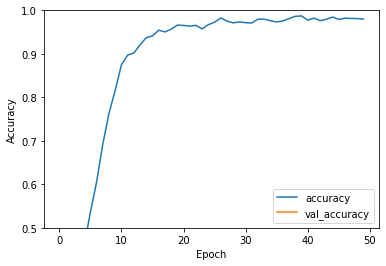

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
